<a href="https://colab.research.google.com/github/chmawnt/Complete-Feature-Selection/blob/master/medical_data_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
df = pd.read_csv('medical_examination.csv')

In [4]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49962 entries, 0 to 49961
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49962 non-null  int64  
 1   age          49961 non-null  float64
 2   sex          49961 non-null  float64
 3   height       49961 non-null  float64
 4   weight       49961 non-null  float64
 5   ap_hi        49961 non-null  float64
 6   ap_lo        49961 non-null  float64
 7   cholesterol  49961 non-null  float64
 8   gluc         49961 non-null  float64
 9   smoke        49961 non-null  float64
 10  alco         49961 non-null  float64
 11  active       49961 non-null  float64
 12  cardio       49961 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 5.0 MB


In [6]:
# Add 'overweight' column

#function to get bmi (body mass index)
def bmi(height, weight):
    return weight / ((height / 100)**2)   


df['overweight'] = df[['height', 'weight']].apply(lambda x: 1 if bmi(x['height'], x['weight']) > 25 else 0, axis=1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,1
2,2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,1
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,0


In [7]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393.0,2.0,168.0,62.0,110.0,80.0,0,0,0.0,0.0,1.0,0.0,0
1,1,20228.0,1.0,156.0,85.0,140.0,90.0,1,0,0.0,0.0,1.0,1.0,1
2,2,18857.0,1.0,165.0,64.0,130.0,70.0,1,0,0.0,0.0,0.0,1.0,0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,0,0,0.0,0.0,1.0,1.0,1
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,0,0,0.0,0.0,0.0,0.0,0


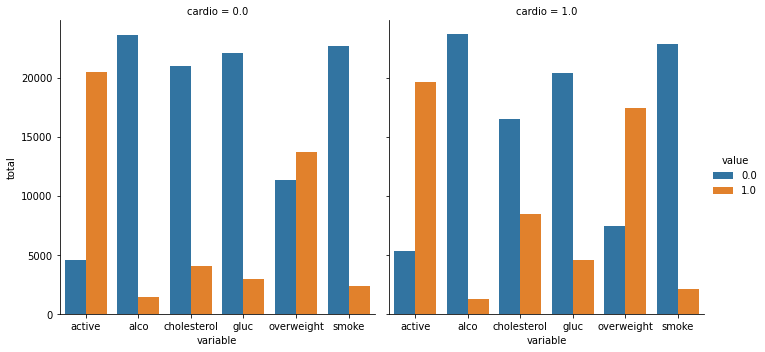

In [8]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 
    #'active', and 'overweight'.
    df_cat = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='variable', hue='value', col="cardio", 
                data=df_cat, kind="count")
    fig.set( ylabel='total')

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig
f= draw_cat_plot()

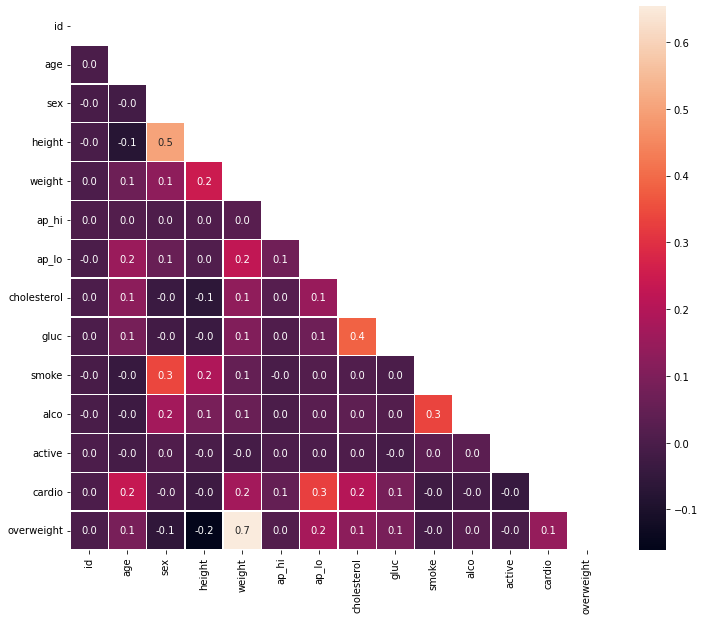

In [9]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= df['height'].quantile(0.025)) & 
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) & 
             (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.3)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
f = draw_heat_map()